In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from unidecode import unidecode

In [ ]:
df = pd.read_csv('../data/preprocessed/details_houses_2019-07-04.csv')


In [43]:
df_obj = df.select_dtypes(include='object').fillna('').apply(lambda x: x.apply(lambda y: unidecode(y.lower())))
df_num = df.select_dtypes(exclude='object')
df_raw = pd.concat([df_num, df_obj], axis=1)

In [44]:
df_raw

,acepta_permuta,altura_permitida,ambientes,ambientes_extra,ano_de_construccion,aptos_por_piso,banos,banos_extra,cantidad_de_pisos,casco,...,disposicion,estado,extra,kind,referencia,sobre,tipo_propiedad,title,uri,zona
0,NaN,NaN,1.0,False,NaN,NaN,1.0,False,NaN,NaN,...,,buen estado,,venta,f58d9,,local industrial o galpon,local industrial o galpon en aguada,https://www.infocasas.com.uy/local-industrial-...,aguada
1,NaN,NaN,NaN,False,NaN,NaN,1.0,False,NaN,NaN,...,,buen estado,,venta,d4dc2,,apartamentos,apartamentos en union,https://www.infocasas.com.uy/apartamentos-en-u...,union
2,NaN,NaN,NaN,False,NaN,NaN,3.0,True,2.0,NaN,...,,buen estado,"terraza,patio,parrillero,jardin,jacuzzi,garaje...",venta,25f17,,casas,"bustamante 8888, buceo",https://www.infocasas.com.uy/bustamante-8888-b...,buceo
3,NaN,NaN,NaN,False,1980.0,NaN,3.0,True,NaN,NaN,...,al frente,a reciclar,"terraza,placard en dormitorio,placard en cocin...",venta,c3633,avenida,casas,casa 4 dormitorios y servicio en parque batlle,https://www.infocasas.com.uy/casa-4-dormitorio...,parque batlle
4,NaN,NaN,NaN,False,NaN,NaN,NaN,False,NaN,NaN,...,,,,,,,,departamento - pocitos,https://www.infocasas.com.uy/unidades/venta/18...,
5,NaN,NaN,NaN,False,NaN,NaN,2.0,False,NaN,NaN,...,,excelente estado,"patio,parrillero,barbacoa,calefaccion central",venta,de528,,apartamentos,se vende hermoso apto en pocitos 3 dormitorios...,https://www.infocasas.com.uy/se-vende-hermoso-...,pocitos
6,NaN,NaN,NaN,False,2019.0,NaN,1.0,False,NaN,NaN,...,,buen estado,aire acondicionado,venta,2369a,,apartamentos,apartamento 1 dormitorio pocitos excelente punto.,https://www.infocasas.com.uy/apartamento-1-dor...,pocitos
7,NaN,NaN,NaN,False,1979.0,NaN,1.0,False,NaN,NaN,...,al frente,excelente estado,"terraza,se aceptan mascotas,lavadero,jardin,ba...",venta,1ace3,,casas,"casa - prado. garaje, barbacoa y fondo.",https://www.infocasas.com.uy/casa-prado-garaje...,prado
8,NaN,NaN,NaN,False,NaN,NaN,3.0,True,NaN,NaN,...,,buen estado,"piscina,garaje,estufa a lena,calefaccion",venta,57ae1,,casas,una propiedad unica en carrasco,https://www.infocasas.com.uy/una-propiedad-nic...,carrasco
9,NaN,NaN,2.0,False,NaN,NaN,1.0,False,NaN,NaN,...,,,,venta,e7a73,,local industrial o galpon,casablanca - excelente punto,https://www.infocasas.com.uy/casablanca-excele...,arroyo seco


In [49]:
mask = ((df_raw['oficina'] != 1) & (df_raw['penthouse'] != 1) & df_raw['tipo_propiedad'].isin(['apartamento', 'casas']))
df_raw = df_raw[mask]

In [50]:
columns = ['banos', 'disposicion', 'dormitorios',
           'estado', 'garajes', 'gastos_comunes', 'longitud_frente',
           'm2_de_la_terraza', 'm2_del_terreno', 'm2_edificados',
           'piso', 'price', 'tipo_propiedad', 'vivienda_social', 'zona']

In [73]:
df_selected = df_raw[columns].reset_index(drop=True)
fill_zero_col = ['m2_de_la_terraza', 'vivienda_social', 'piso', 'longitud_frente', 'gastos_comunes', 'garajes']
df_selected.loc[:, fill_zero_col] = df_selected.loc[:, fill_zero_col].fillna(0)
mask_m2_terreno = df_selected['m2_del_terreno'].isna()
df_selected.loc[mask_m2_terreno, 'm2_del_terreno'] = df_selected.loc[mask_m2_terreno, 'm2_edificados']
(
    df_selected
    .isna()
    .sum()
)

banos                24
disposicion           0
dormitorios          16
estado                0
garajes               0
gastos_comunes        0
longitud_frente       0
m2_de_la_terraza      0
m2_del_terreno       44
m2_edificados       106
piso                  0
price                24
tipo_propiedad        0
vivienda_social       0
zona                  0
dtype: int64

In [75]:
df_selected.dropna(inplace=True)

In [78]:
df_num_selected = df_selected.select_dtypes(exclude='object')

In [92]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [93]:
pca = PCA(n_components=3,)
arr = pca.fit_transform(scaler.fit_transform(df_num_selected))

In [94]:
pca.explained_variance_ratio_

array([0.62062608, 0.13988148, 0.09337384])

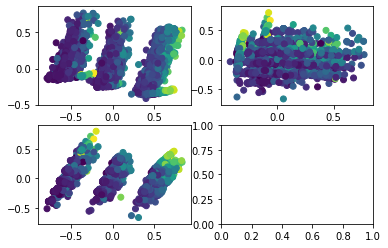

In [100]:
f, ax = plt.subplots(2,2)
ax[0, 0].scatter(arr[:,0], arr[:,1], c=df_num_selected['m2_edificados'])
ax[0, 1].scatter(arr[:,1], arr[:,2], c=df_num_selected['m2_edificados'])
ax[1, 0].scatter(arr[:,0], arr[:,2], c=df_num_selected['m2_edificados'])

In [24]:
features = df_dataset['area_m2'].to_numpy().reshape(-1, 1)
price = df_dataset['price'].to_numpy().reshape(-1, 1)


In [41]:
model = LinearRegression(fit_intercept=True)
model.fit(features, price)
model.coef_, model.intercept_, model.rank_

(array([[1560.97132379]]), array([81512.18968224]), 1)

In [33]:
area_test = np.linspace(40, 1000, 100).reshape(-1, 1)
price_test = model.predict(area_test)

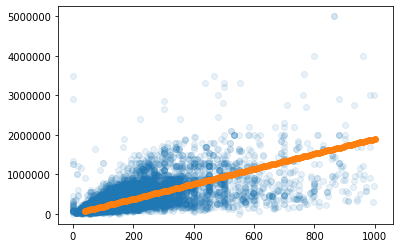

In [34]:
plt.scatter(features, price, alpha=0.1)
plt.scatter(area_test, price_test)
